<a href="https://colab.research.google.com/github/Nwosu-Ihueze/Capital_city_classification/blob/main/city_feats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capital City Features Classification

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#cd folder path
%cd /content/drive/MyDrive/city_classification/

/content/drive/MyDrive/city_classification


In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#Load dataset
cityFeats = pd.read_csv('Capital_City_Fates.csv')

In [5]:
#First five rows of dataset
cityFeats.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [6]:
#Statistical data
cityFeats.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [7]:
#Dataset information
cityFeats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
#Check for null values
cityFeats.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [11]:
#Import more libraries
import seaborn as sns
from pandas.plotting import scatter_matrix
sns.set_theme(style="ticks", color_codes=True)

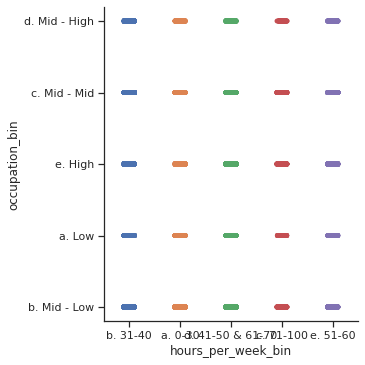

In [13]:
#Catplot visualization
sns.catplot(x="hours_per_week_bin", y="occupation_bin", data=cityFeats)

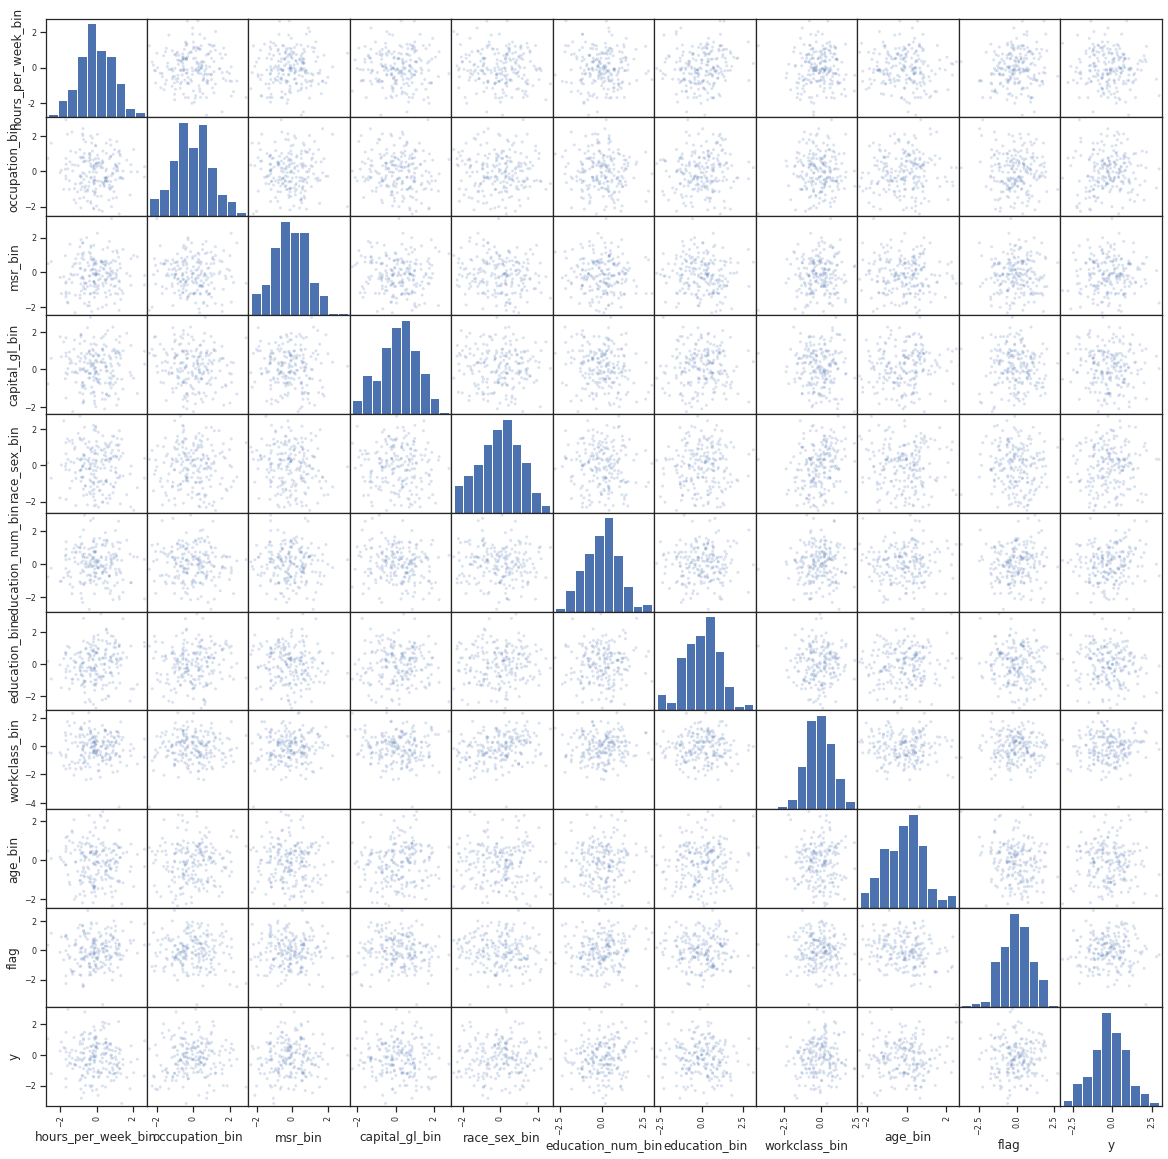

In [12]:
#Scattermatrix visualization
data = pd.DataFrame(np.random.randn(200, 11), columns = cityFeats.columns)
scatter_matrix(data, alpha=0.2, figsize=(20, 20))
plt.show()

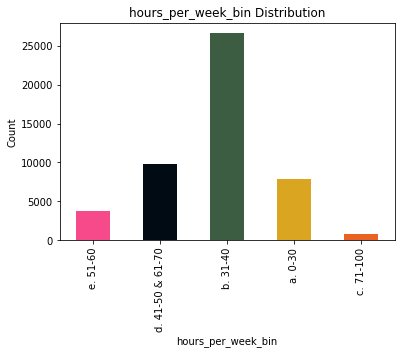

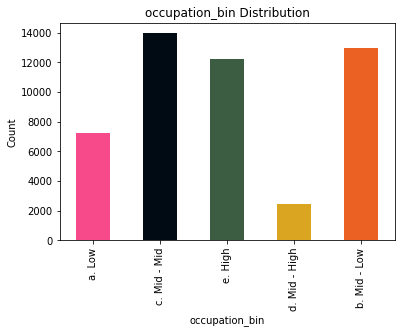

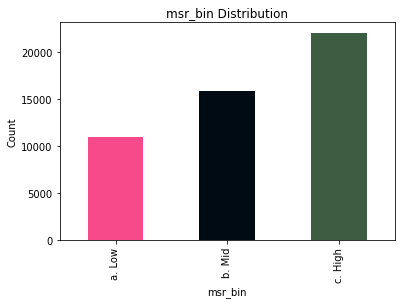

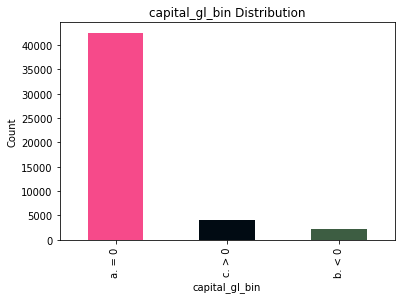

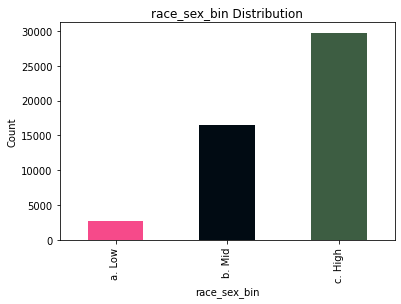

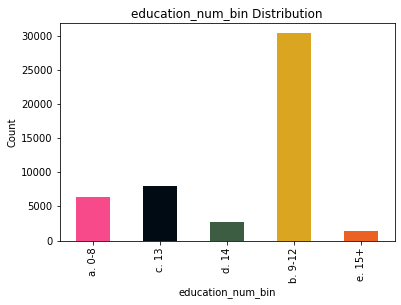

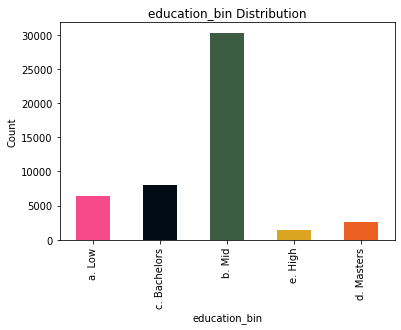

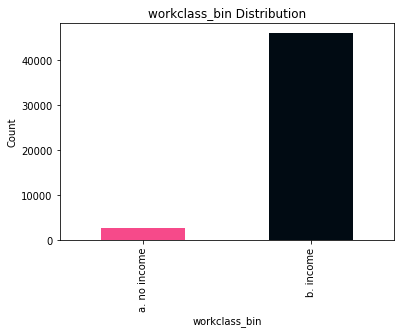

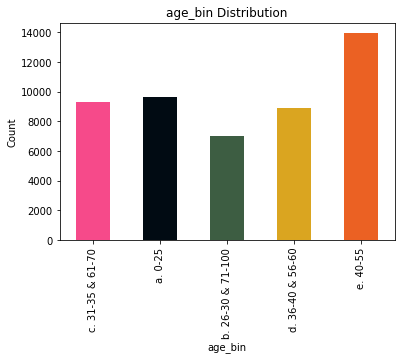

In [10]:
#Barplot visualization
colors = ['#f64a8a', '#010b13', '#3d5d42', '#daa520', '#eb6123', '#4997d0', '#ffe4b5', '#808080']
for cols in range(9):
    cityFeats.iloc[:, cols].value_counts(sort=False).plot(kind='bar', color = colors)

    plt.title(cityFeats.columns[cols] + ' Distribution')
    plt.xlabel(cityFeats.columns[cols])
    plt.ylabel('Count') 

    plt.show()

In [14]:
#Splitting dataset
train = cityFeats[cityFeats['flag']=='train']
test = cityFeats[cityFeats['flag']=='test']

In [15]:
X_train = train.iloc[:,0:-2]
X_test = test.iloc[:,0:-2]

y_train = train.iloc[:, -1]
y_test = test.iloc[:, -1]

In [16]:
#Encode categorical libraries
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [17]:
#import model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.metrics import confusion_matrix

In [19]:
# Initialize model
city_lr = LogisticRegression()

# Fit model
city_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Train data:


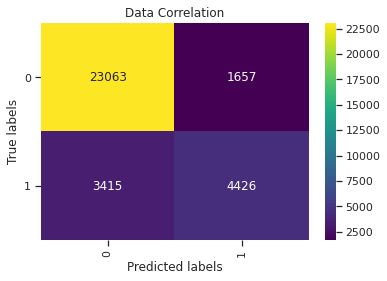

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24720
           1       0.73      0.56      0.64      7841

    accuracy                           0.84     32561
   macro avg       0.80      0.75      0.77     32561
weighted avg       0.84      0.84      0.84     32561



In [24]:
#Prediction with train set
city_pred = city_lr.predict(X_train)
print(f'Train data:')

#Visualization
city_matrix = confusion_matrix(y_train, city_pred)
city_labels = city_lr.classes_

plt.clf()
ax = plt.subplot()
sns.heatmap(city_matrix, annot=True, ax = ax,fmt="d", cmap='viridis
');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Data Correlation');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(city_labels); 
ax.yaxis.set_ticklabels(city_labels);
plt.show()

result = classification_report(y_train, city_pred)


print(result)

Test data:


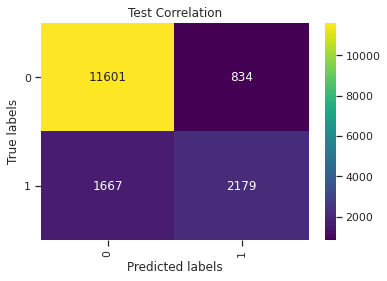

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.72      0.57      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [26]:
#Visualization with test set
city_test = city_lr.predict(X_test)

print(f'Test data:')
#Visualization
city_matrix = confusion_matrix(y_test, city_test)
city_labels = city_lr.classes_

ax = plt.subplot()
sns.heatmap(city_matrix, annot=True, ax = ax,fmt="d", cmap='viridis');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Test Correlation');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(city_labels); 
ax.yaxis.set_ticklabels(city_labels);
plt.show()

test_result = classification_report(y_test, city_test)


print(test_result)


In [31]:
#Renaming columns because model couldn't accept '<' ',' '>' '='
X_train.rename(columns={'capital_gl_bin_a. = 0':'capital_gl_bin_a. equals 0', 
                       'capital_gl_bin_b. < 0': 'capital_gl_bin_b. less than 0', 
                      'capital_gl_bin_c. > 0': 'capital_gl_bin_c. greater than 0'}, inplace =True)
X_test.rename(columns={'capital_gl_bin_a. = 0':'capital_gl_bin_a. equals 0', 
                       'capital_gl_bin_b. < 0': 'capital_gl_bin_b. less than 0', 
                      'capital_gl_bin_c. > 0': 'capital_gl_bin_c. greater than 0'}, inplace =True)


In [32]:
#Initialize model
city_boost = xgb.XGBClassifier()
#Fit model
city_boost.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Train data:


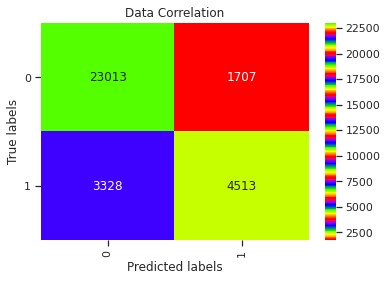

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     24720
           1       0.73      0.58      0.64      7841

    accuracy                           0.85     32561
   macro avg       0.80      0.75      0.77     32561
weighted avg       0.84      0.85      0.84     32561



In [35]:
#Prediction with train set
boost_pred = city_boost.predict(X_train)
print(f'Train data:')
#Visualization
boost_matrix = confusion_matrix(y_train, boost_pred)
boost_labels = city_boost.classes_

plt.clf()
ax = plt.subplot()
sns.heatmap(boost_matrix, annot=True, ax = ax,fmt="d", cmap='prism');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Data Correlation');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(boost_labels); 
ax.yaxis.set_ticklabels(boost_labels);
plt.show()

result = classification_report(y_train, boost_pred)


print(result)

Test data:


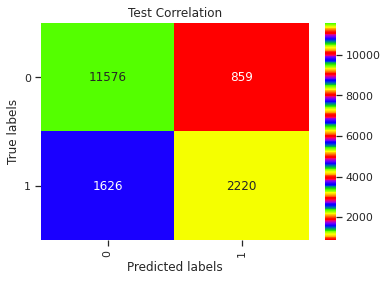

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.72      0.58      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [37]:
#Prediction with test set
boost_test = city_boost.predict(X_test)

print(f'Test data:')
#Visualization
test_matrix = confusion_matrix(y_test, boost_test)
test_labels = city_boost.classes_

ax = plt.subplot()
sns.heatmap(test_matrix, annot=True, ax = ax,fmt="d", cmap='prism');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Test Correlation');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(test_labels); 
ax.yaxis.set_ticklabels(test_labels);
plt.show()

result = classification_report(y_test, boost_test)


print(result)

###Observation:
Though the difference in performance of the two models aren't much, XGBoost model performed better.